In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [124]:

data = pd.read_csv('Housing.csv')


In [125]:
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


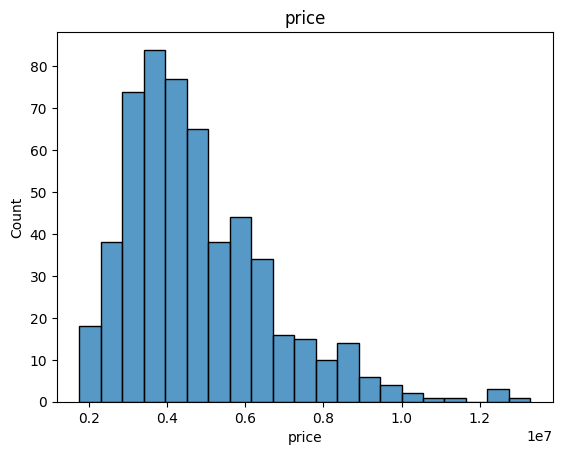

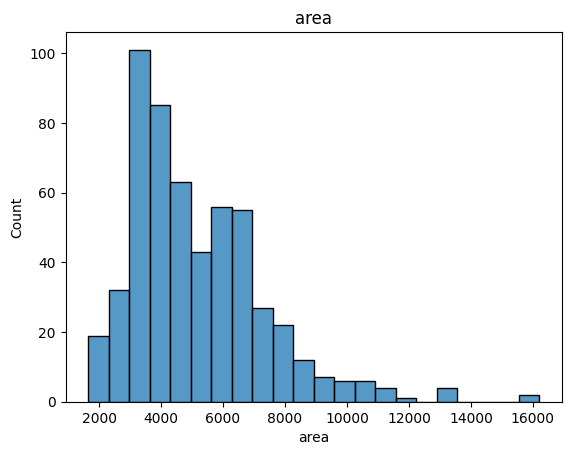

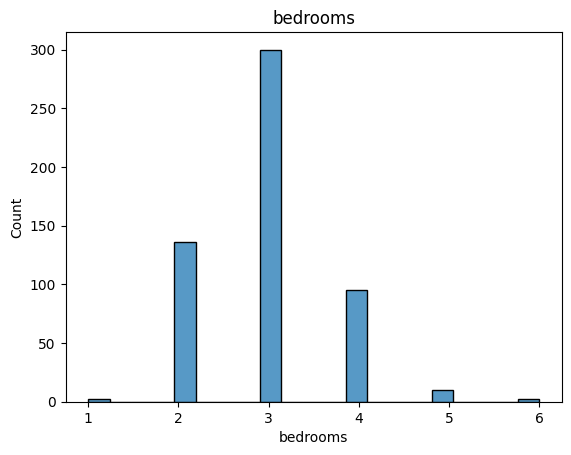

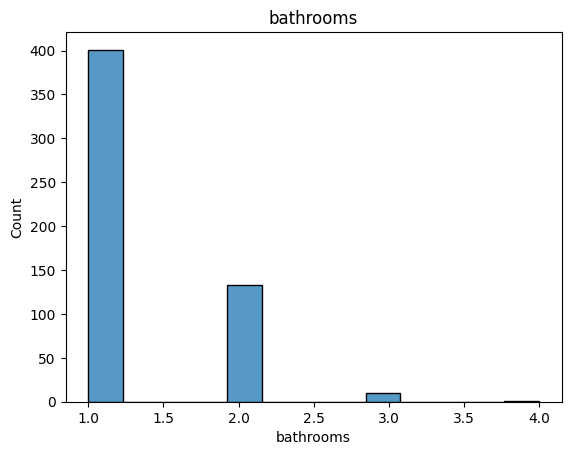

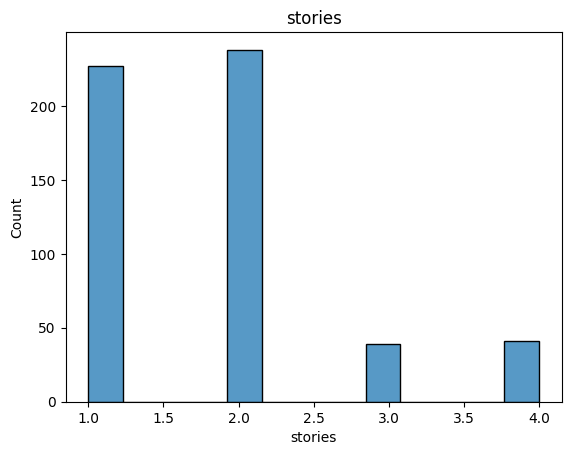

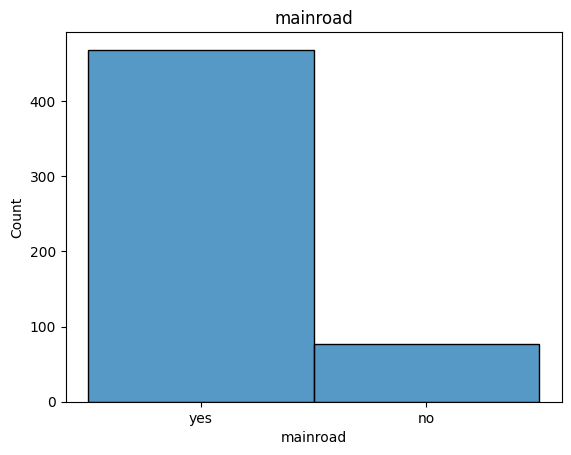

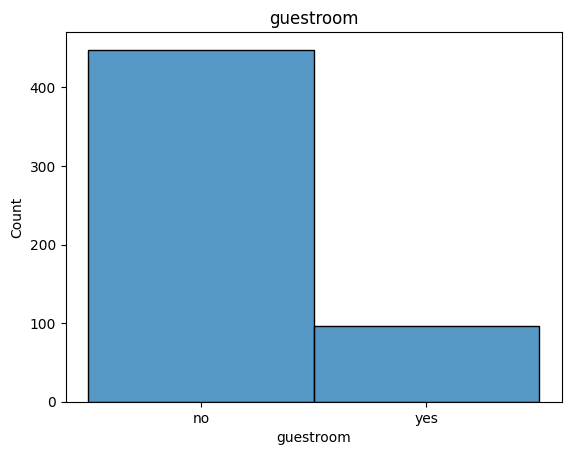

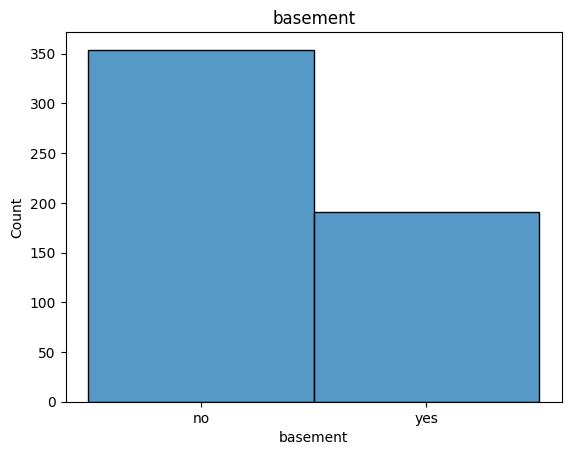

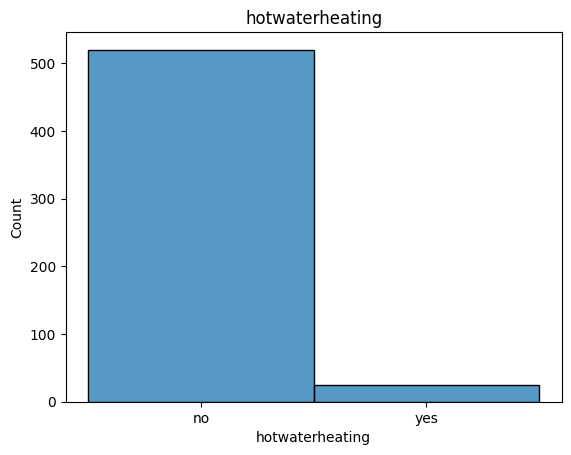

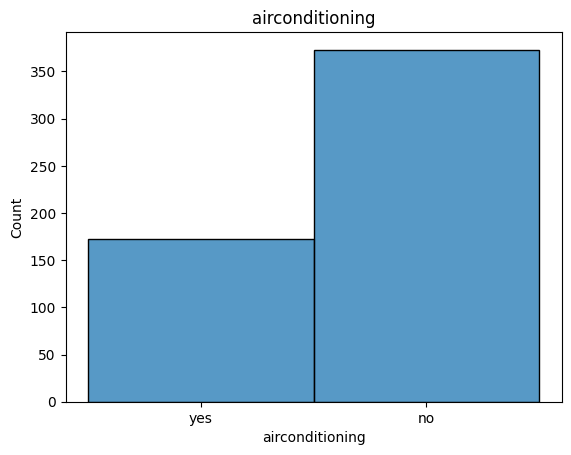

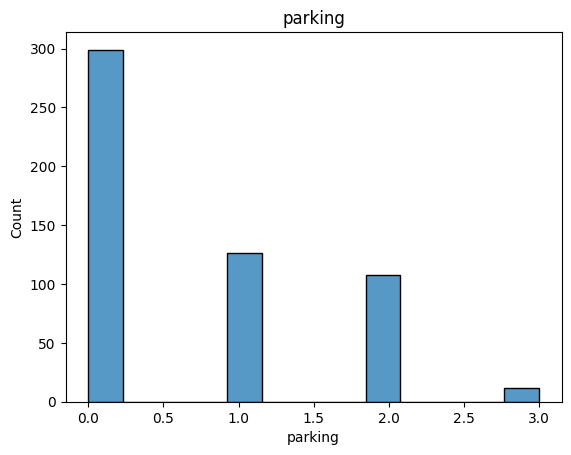

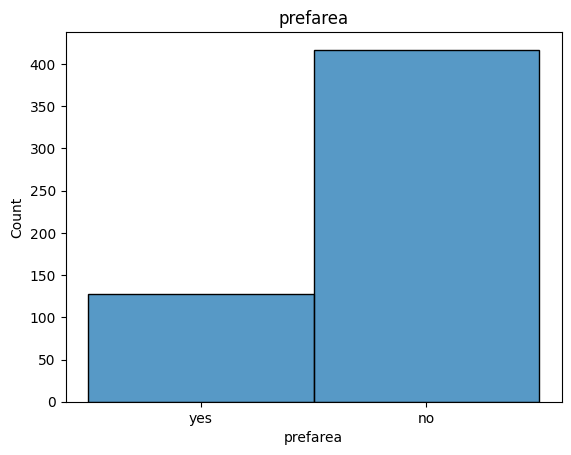

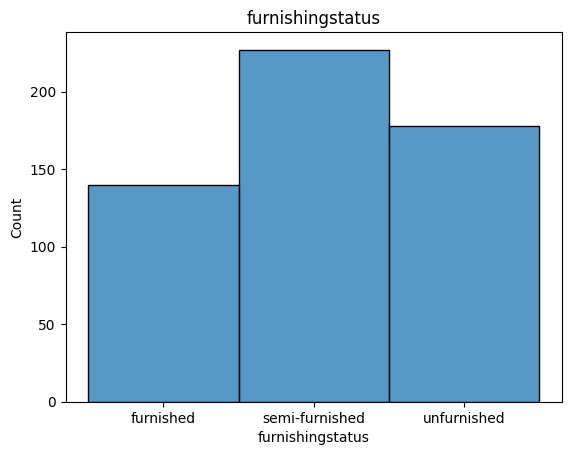

In [126]:
# Univariate Analysis
for col in data.columns:
    plt.figure()
    sns.histplot(data[col])
    plt.title(col)

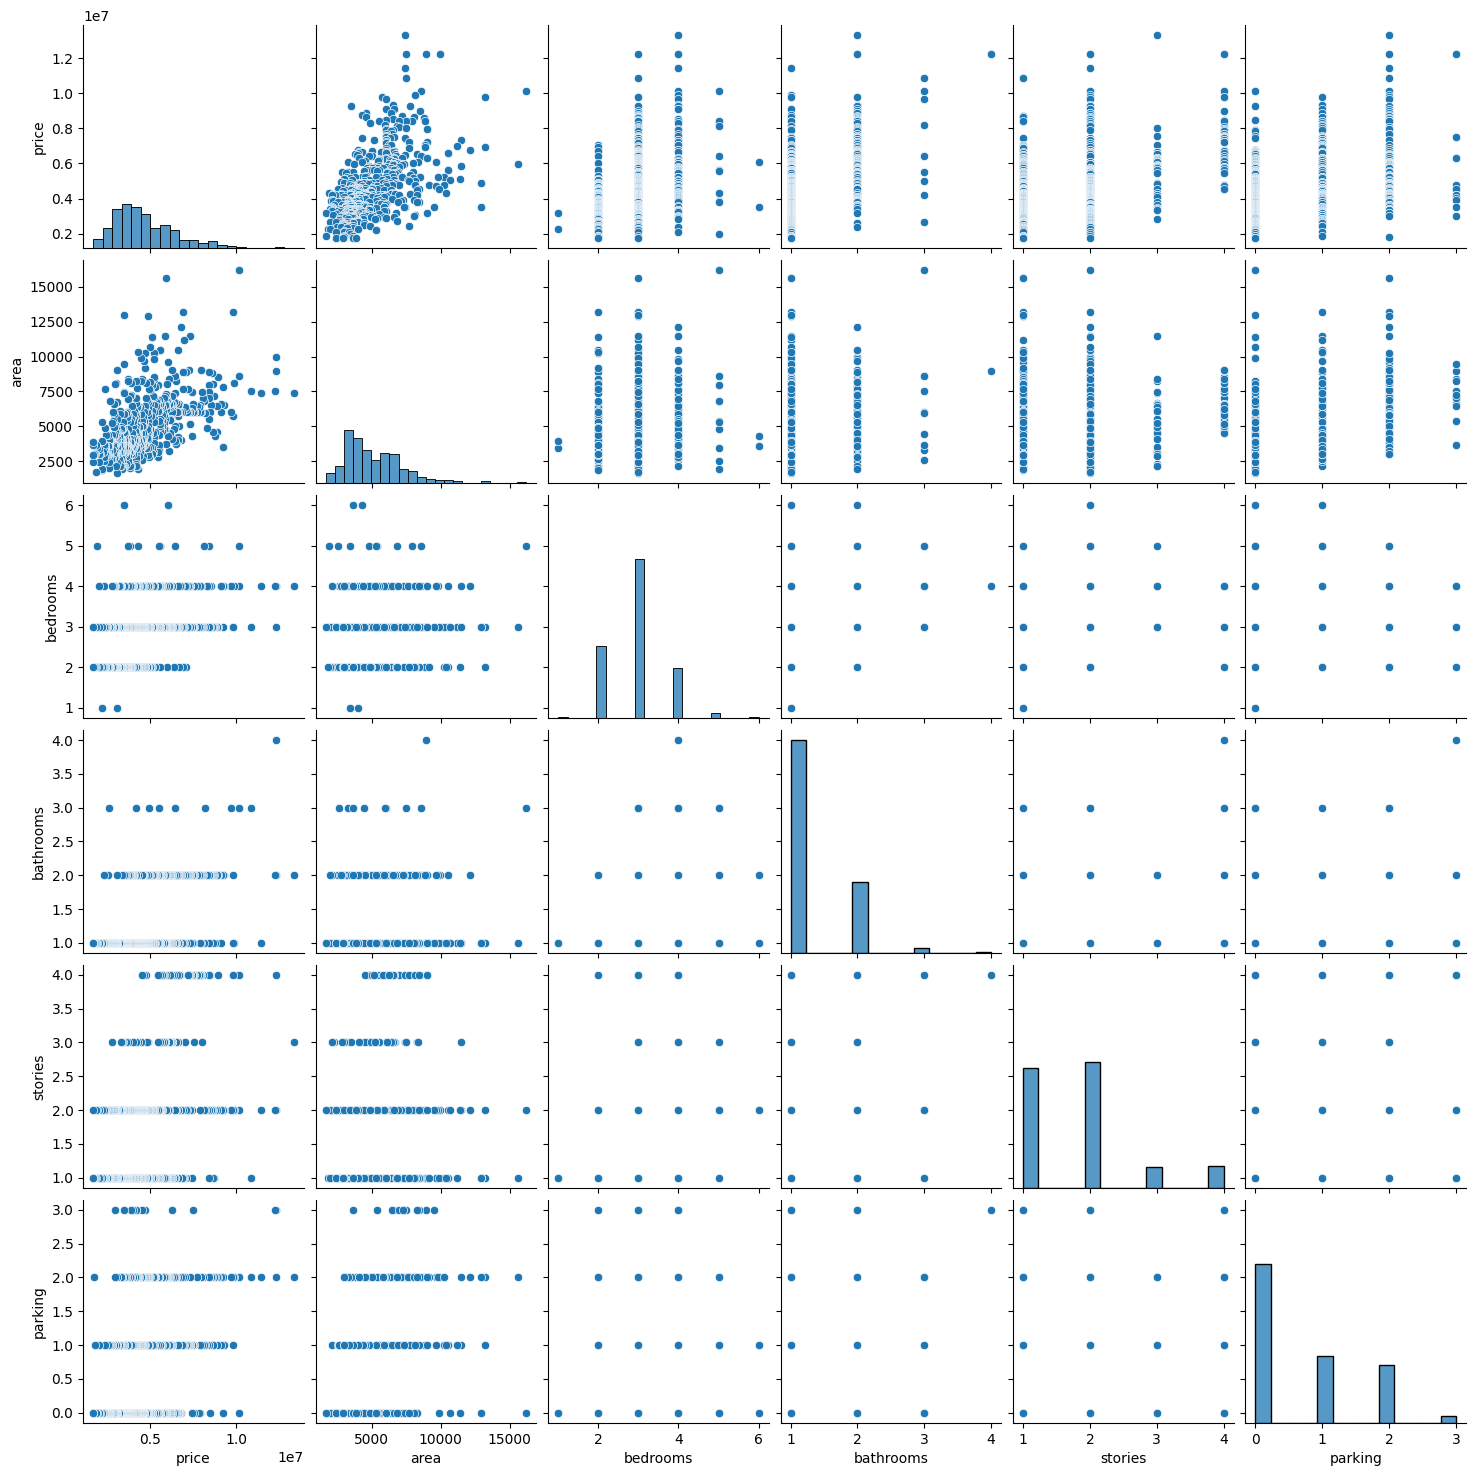

In [127]:
# Bi-Variate Analysis
sns.pairplot(data)

<ipython-input-128-fe8457e16baa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

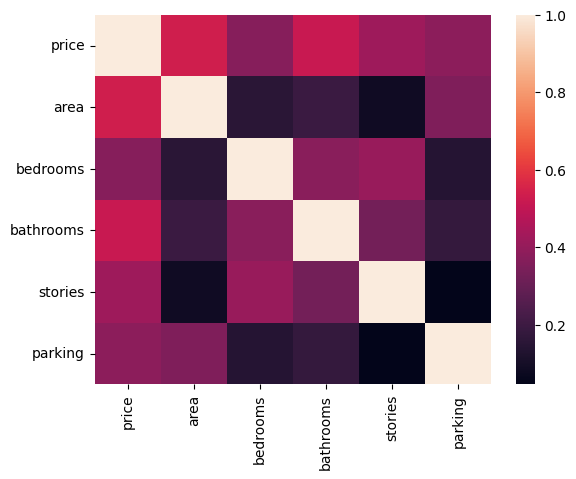

In [128]:
# Multi-Variate Analysis
sns.heatmap(data.corr())

In [129]:
# Descriptive statistics
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [130]:
# Handling missing values
print(data.isnull().sum())
#No missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


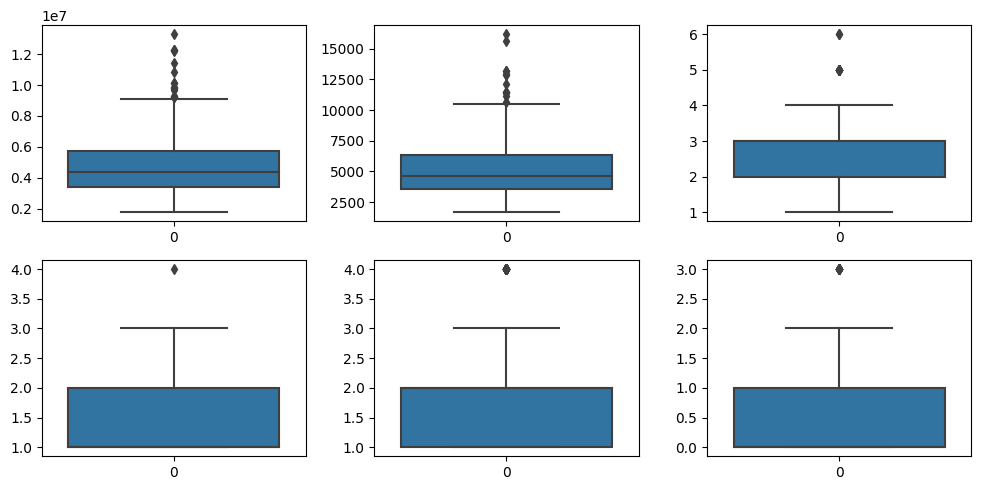

In [131]:

# Find outliers using boxplot
fig, axis = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axis[0,0])
plt2 = sns.boxplot(data['area'], ax = axis[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axis[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axis[1,0])
plt2 = sns.boxplot(data['stories'], ax = axis[1,1])
plt3 = sns.boxplot(data['parking'], ax = axis[1,2])

plt.tight_layout()

In [132]:
# Replace outliers with the median value
from scipy.stats import zscore

z_scores = zscore(data.select_dtypes(include='number'))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [133]:
# Convert the categorical columns
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
print(data.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object


<ipython-input-133-9c139035bf45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
<ipython-input-133-9c139035bf45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
<ipython-input-133-9c139035bf45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [134]:
# Perform encoding using pandas' get_dummies() method
furnishingstatus = pd.get_dummies(data['furnishingstatus'])
# Removing the first column since it is enough to classify the furnishing status of the house
furnishingstatus = pd.get_dummies(data['furnishingstatus'], drop_first = True)
# Merge the furnishing status and house details
data = pd.concat([data, furnishingstatus], axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,1
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
13,9240000,3500,4,2,2,1,0,0,1,0,2,0,furnished,0,0
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,semi-furnished,1,0


In [135]:
# Drop 'furnishingstatus' as we have created the dummies for it

data.drop(['furnishingstatus'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,1,0
13,9240000,3500,4,2,2,1,0,0,1,0,2,0,0,0
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,1,0


In [136]:
# Scale the data since Area and other values have bigger difference in their values
from sklearn.preprocessing import MinMaxScaler

# Using Min-Max Scaler
scaler = MinMaxScaler()

#Applying scaler to all columns except the Categorical ones
scale_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

data[scale_col] = scaler.fit_transform(data[scale_col])


In [137]:
# Split the data into dependent and independent variables
X = data.drop(['price'], axis=1)
y = data['price']

In [138]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [139]:
# Build the linear regression model using sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [140]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [141]:
# Test the model
y_pred = model.predict(X_test)


In [142]:
# Measure the performance using Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.10124528445035053
Mean Squared Error: 0.018128920004785005
Root Mean Squared Error: 0.13464367792356613
R2 Score: 0.6160991337780066
